# Social network ads analysis - KNN, Decision tree, Random forest

# Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Reading and viewing the dataset

In [2]:
df=pd.read_csv('Social_Network_Ads.csv')
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [3]:
df.shape

(400, 5)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [5]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [6]:
df.isna().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [3]:
df.Gender=df.Gender.replace({'Male':1,'Female':0})

In [4]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0
...,...,...,...,...,...
395,15691863,0,46,41000,1
396,15706071,1,51,23000,1
397,15654296,0,50,20000,1
398,15755018,1,36,33000,0


In [5]:
from sklearn.model_selection import train_test_split

In [6]:
y=df['Purchased']
x=df.drop(['Purchased'],axis=1)

In [7]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=1)

In [8]:
x_train.shape

(300, 4)

In [9]:
x_test.shape

(100, 4)

# KNN

In [14]:
from sklearn.neighbors import KNeighborsClassifier

In [15]:
model=KNeighborsClassifier(n_neighbors=5)

In [16]:
model.fit(x_train,y_train)

KNeighborsClassifier()

In [17]:
model.score(x_train,y_train)

0.8466666666666667

In [18]:
model.score(x_test,y_test)

0.65

In [19]:
from sklearn.metrics import accuracy_score

In [20]:
y_pred=model.predict(x_test)

In [21]:
accuracy_score(y_test,y_pred)*100

65.0

In [22]:
from sklearn.metrics import confusion_matrix

In [23]:
performance=confusion_matrix(y_test,y_pred)

In [24]:
performance

array([[44, 14],
       [21, 21]], dtype=int64)

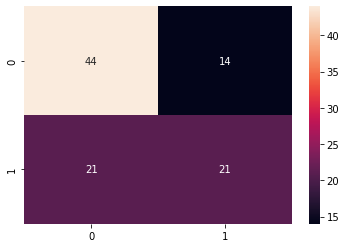

In [25]:
sns.heatmap(performance,annot=True)
plt.show()

In [26]:
model=KNeighborsClassifier(n_neighbors=10)

In [27]:
model.fit(x,y)

KNeighborsClassifier(n_neighbors=10)

In [28]:
model.score(x_train,y_train)

0.82

In [29]:
model.score(x_test,y_test)

0.68

In [30]:
y_pre=model.predict(x_test)

In [31]:
accuracy_score(y_test,y_pre)*100

68.0

# Decision tree

In [32]:
from sklearn.tree import DecisionTreeClassifier

In [33]:
model=DecisionTreeClassifier()
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [34]:
model.score(x_train,y_train)

1.0

In [35]:
model.score(x_test,y_test)

0.8

In [36]:
y_predict=model.predict(x_test)

In [37]:
accuracy_score(y_test,y_predict)*100

80.0

# Random Forest 

In [38]:
from sklearn.ensemble import RandomForestClassifier

In [40]:
model=RandomForestClassifier(n_estimators=20)
model.fit(x_train,y_train)

RandomForestClassifier(n_estimators=20)

In [41]:
model.score(x_train,y_train)

1.0

In [42]:
model.score(x_test,y_test)

0.88

In [43]:
y_predic=model.predict(x_test)

In [44]:
accuracy_score(y_test,y_predic)*100

88.0

# SVM

In [45]:
from sklearn.svm import SVC

In [46]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=1)

In [47]:
model=SVC()

In [48]:
model.fit(x_train,y_train)

SVC()

In [49]:
model.score(x_train,y_train)

0.6633333333333333

In [50]:
model.score(x_test,y_test)

0.58

In [51]:
y_predict=model.predict(x_test)
y_predict

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [52]:
accuracy_score(y_test,y_predict)*100

57.99999999999999

In [53]:
from sklearn.metrics import confusion_matrix

In [54]:
performance=confusion_matrix(y_test,y_predict)
performance

array([[58,  0],
       [42,  0]], dtype=int64)

In [55]:
from sklearn.metrics import plot_confusion_matrix

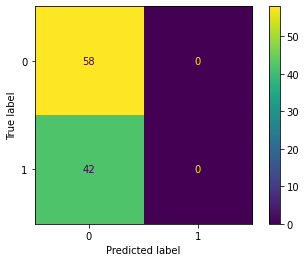

In [56]:
plot_confusion_matrix(model,x_test,y_test)
plt.show()

In [10]:
from sklearn.naive_bayes import GaussianNB

In [11]:
model=GaussianNB()
model.fit(x_train,y_train)

GaussianNB()

In [12]:
model.score(x_test,y_test)

0.86

# Observation
 
  1. KNN - the accuracy is 65%
  2. Decision Tree - the accuracy is 80%
  3. Random Forest - the accuracy is 88%
  4. SVM - the accuracy is 58%
  5. Naive Bayes - the accuracy is 86%